In [1]:
Adress="/kaggle/input/diabetes-dataset/diabetes.csv"

In [2]:
#importing of modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()


In [3]:
#load of data
df = pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.csv")

# Exploratory and preprocessing of data

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Definition of columns:
#### Pregnancies: number of pregnancies
#### Glucose: glucose blood level
#### Insulin: insulin blood level
#### BMI: body mass index
#### DiabtesPedigreeFunction: function that scores the likelihood of diabetes based on family history.
#### Outcome: diabetic (1) or not (0)

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## NOTE:
#### Normal fasting blood glucose level = 70-100mg/dl
#### Normal fasting blood insulin level = < 25 mIU/L 
#### Normal blood pressure = between 120/80mm Hg amd 140/90 mm Hg

In [8]:
df.shape

(768, 9)

# Analysis of data

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


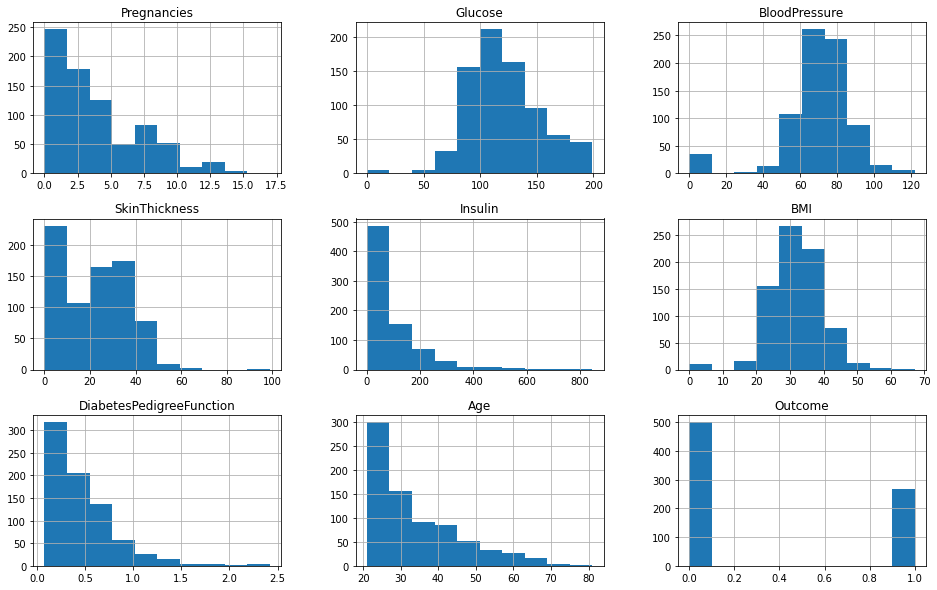

In [10]:
df.hist(figsize=(16, 10));

#### non diabetic < diabetic
#### age is mostly between 24 and 41


In [11]:
#Calculate number of zero values
for col in df:
    print("Count of zero of {} column is: {}".format(col, df.Age[df[col]==0].count()))

Count of zero of Pregnancies column is: 111
Count of zero of Glucose column is: 5
Count of zero of BloodPressure column is: 35
Count of zero of SkinThickness column is: 227
Count of zero of Insulin column is: 374
Count of zero of BMI column is: 11
Count of zero of DiabetesPedigreeFunction column is: 0
Count of zero of Age column is: 0
Count of zero of Outcome column is: 500


#### Skinthickness and Insulin have high zero values
#### zero values for outcom and pregnancies is logic

#### 

In [12]:

df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#### #all measurments have a positive influence on diabetes but BP and SkinThickness have little.
#### # BP and BMI and Glucose level increases by age.
#### # Glucose increse as insulin increase as insulin do not do its work (insensitivity of insulin receptors) 


In [13]:
# function to visualize relationship:
def re(colnam1, colnam2):
    plt.figure(figsize=(16, 6))
    sns.regplot(x=df[colnam1], y=df[colnam2])
    sns.set_style("darkgrid")

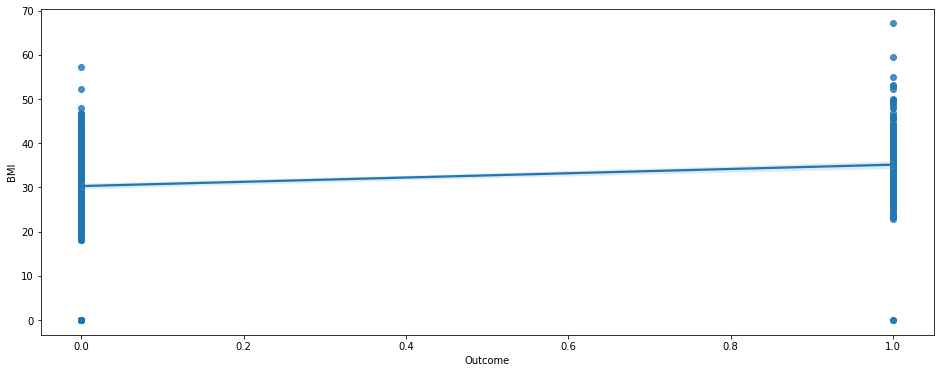

In [14]:
re("Outcome", "BMI")

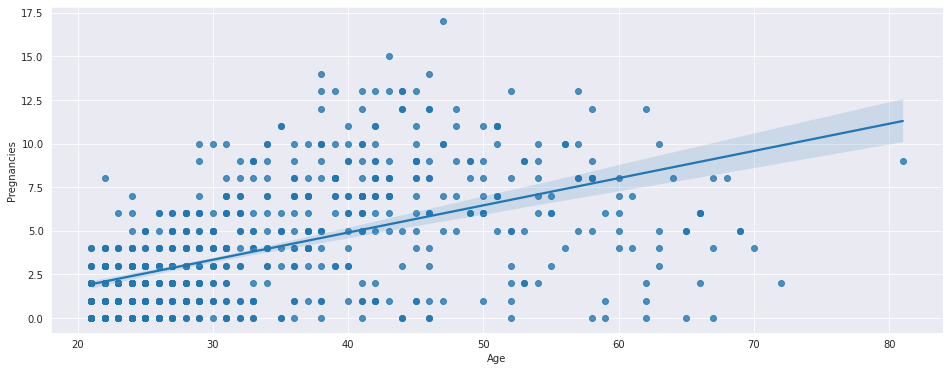

In [15]:
re("Age", "Pregnancies")

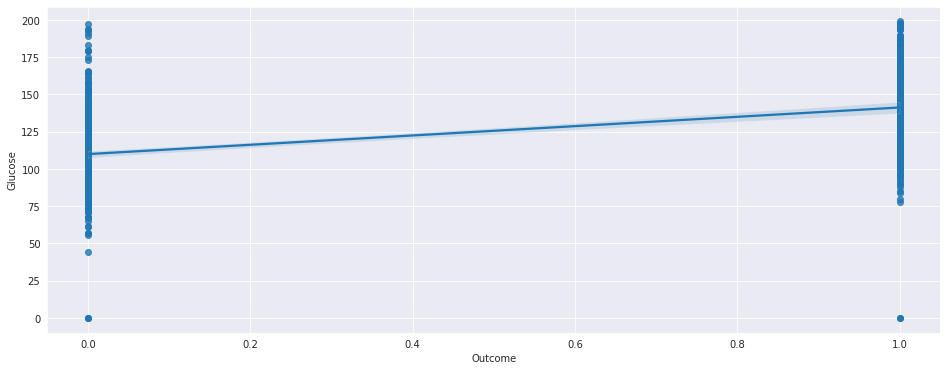

In [16]:
re("Outcome", "Glucose")

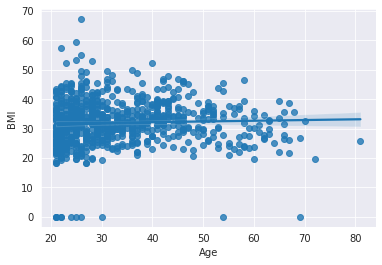

In [17]:
sns.regplot(x=df.Age, y=df.BMI);

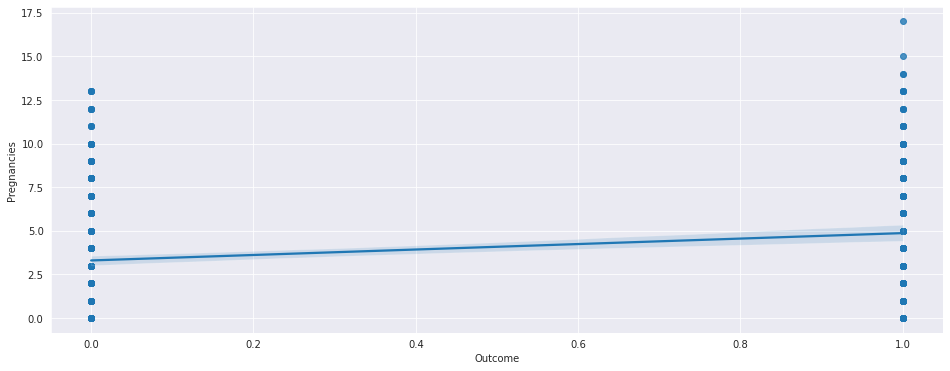

In [18]:
re("Outcome", "Pregnancies")

In [19]:

df.Pregnancies.unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [20]:
df.groupby('Pregnancies')['Outcome'].mean()

Pregnancies
0     0.342342
1     0.214815
2     0.184466
3     0.360000
4     0.338235
5     0.368421
6     0.320000
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: Outcome, dtype: float64

# Diabetes Prediction Model

In [21]:
#Import helpfull libraries

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [22]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [23]:
#Separate target data
y = df.Outcome
features =['Age', 'BMI', 'Pregnancies', 'Insulin', 'DiabetesPedigreeFunction', 'Glucose']
x = df[features]
x.head()

,Age,BMI,Pregnancies,Insulin,DiabetesPedigreeFunction,Glucose
0,50,33.6,6,0,0.627,148
1,31,26.6,1,0,0.351,85
2,32,23.3,8,0,0.672,183
3,21,28.1,1,94,0.167,89
4,33,43.1,0,168,2.288,137


In [24]:
# Split data to validation and trainnig 
train_x,val_x, train_y, val_y = train_test_split(x, y, random_state=1) 

In [25]:
# Define Deision tree model
model = DecisionTreeRegressor(random_state=1)
model.fit(train_x, train_y)
prediction = model.predict(val_x)
prediction

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [26]:
mae= mean_absolute_error(prediction, val_y)
mae

0.2864583333333333

In [27]:
print("Validation MAE for Random Forest Model: {:,f}".format(mae))

Validation MAE for Random Forest Model: 0.286458


In [28]:
list(model.predict(x.tail())) #Prediction

[0.0, 0.0, 1.0, 1.0, 0.0]

In [29]:
list(df['Outcome'].tail())  #Data

[0, 0, 0, 1, 0]

In [30]:
list(model.predict(x.head())) #Prediction

[1.0, 0.0, 1.0, 0.0, 1.0]

In [31]:
list(df['Outcome'].head()) #Data

[1, 0, 1, 0, 1]

In [32]:
x.columns

Index(['Age', 'BMI', 'Pregnancies', 'Insulin', 'DiabetesPedigreeFunction',
       'Glucose'],
      dtype='object')

In [33]:
# Give new data for two women 
female=pd.DataFrame.from_dict({'Age':[55,22],
           'BMI':[35,22],
          'Pregnancies':[6, 5],
           'Insulin': [79, 15],
           'DiabetesPedigreeFunction': [0.5,0.4],
           'Glucose': [170, 100]
          })
female

,Age,BMI,Pregnancies,Insulin,DiabetesPedigreeFunction,Glucose
0,55,35,6,79,0.5,170
1,22,22,5,15,0.4,100


In [34]:
model.predict(female)

array([1., 0.])

In [35]:
pred = model.predict(x.head(20))
pred

array([1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 0.])

In [36]:
real = list(df['Outcome'].head(20))
real

[1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1]

In [37]:
# Real Data comparing to prediction of model
pd.DataFrame({"Real": real, "Prediction": pred})

,Real,Prediction
0,1,1.0
1,0,0.0
2,1,1.0
3,0,0.0
4,1,1.0
5,0,0.0
6,1,1.0
7,0,0.0
8,1,0.0
9,1,1.0


In [38]:
# Give new data for two women 
female2=pd.DataFrame.from_dict({'Age':[70,22],
           'BMI':[34,30],
          'Pregnancies':[6, 0],
           'Insulin': [79, 0],
           'DiabetesPedigreeFunction': [0.5,0.2],
           'Glucose': [170, 190]
          })
female2

,Age,BMI,Pregnancies,Insulin,DiabetesPedigreeFunction,Glucose
0,70,34,6,79,0.5,170
1,22,30,0,0,0.2,190


In [39]:
model.predict(female2)

array([1., 1.])